# HOUSE PRICE PREDICTION 

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer
from pandas.api.types import CategoricalDtype

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

## loading data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train shape :",train.shape)
print("test shape :",test.shape)

train shape : (1460, 81)
test shape : (1459, 80)


## data integration of train and test data

In [3]:
data = pd.concat([train,test])
data.shape

(2919, 81)

In [4]:
pd.set_option("display.max_columns",None)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## checking null values

In [6]:
pd.set_option("display.max_rows",None)
null_val = data.isnull().sum()
null_val

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
null_features = null_val[null_val>0]
null_features.keys()

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [8]:
null_cat_features = data[null_features.keys()].select_dtypes(include="object").columns
print("total :", len(null_cat_features))
null_cat_features


total : 23


Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [9]:
null_num_features=data[null_features.keys()].select_dtypes(include=["int64","float64"]).columns
print("total :", len(null_num_features))
null_num_features

total : 12


Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

## handelling missing values

### handelling categorical missing values

In [10]:
#fixed value imputation
cat1 = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [11]:
imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='NA')
data[cat1] = imputer.fit_transform(data[cat1])

In [12]:
data[cat1].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [13]:
cat2=[]
for i in null_cat_features:
    if i not in cat1:
        cat2.append(i)
cat2
        

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType']

In [14]:
imputer2 = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
data[cat2]=imputer2.fit_transform(data[cat2])

In [15]:
data[cat2].isnull().sum()

MSZoning       0
Alley          0
Utilities      0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
Electrical     0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64

### handelling numerical missing values

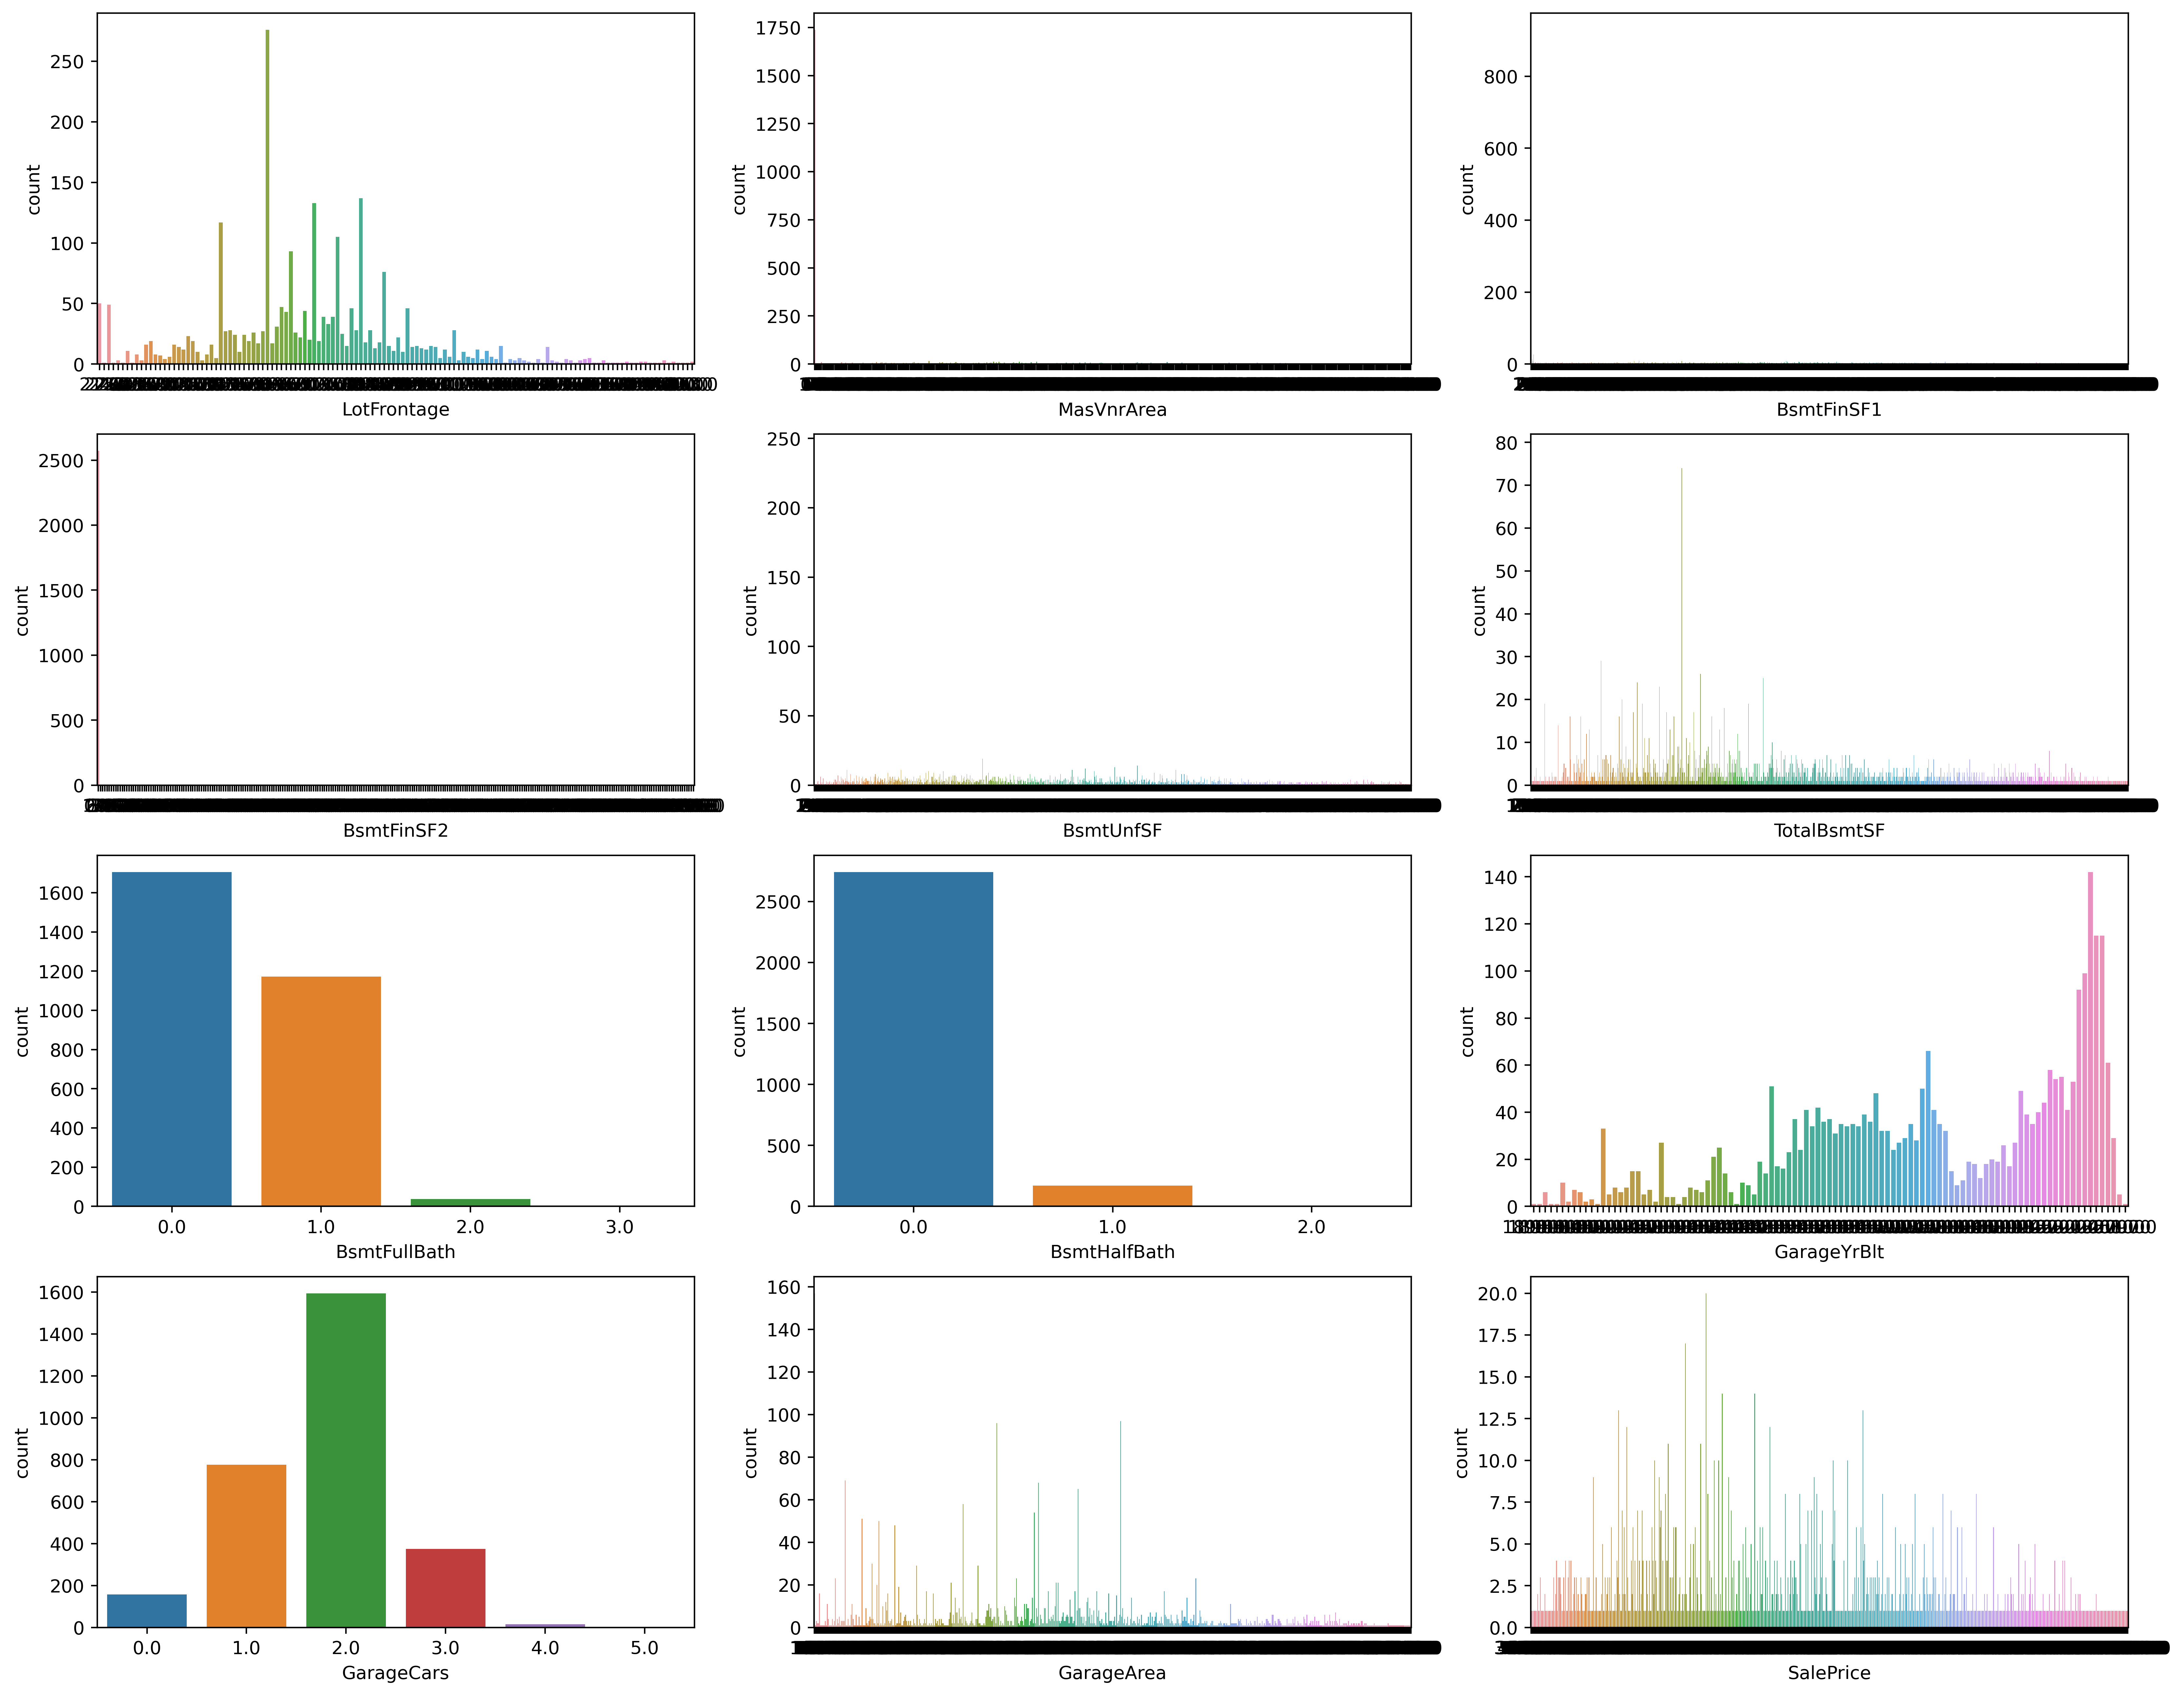

In [17]:
fig = plt.figure(figsize=(20,16),dpi=400)
plt.subplot(4,3,1)
sns.countplot(data,x='LotFrontage')
plt.subplot(4,3,2)
sns.countplot(data,x='MasVnrArea')
plt.subplot(4,3,3)
sns.countplot(data,x='BsmtFinSF1')
plt.subplot(4,3,4)
sns.countplot(data,x='BsmtFinSF2')
plt.subplot(4,3,5)
sns.countplot(data,x='BsmtUnfSF')
plt.subplot(4,3,6)
sns.countplot(data,x='TotalBsmtSF')
plt.subplot(4,3,7)
sns.countplot(data,x='BsmtFullBath')
plt.subplot(4,3,8)
sns.countplot(data,x='BsmtHalfBath')
plt.subplot(4,3,9)
sns.countplot(data,x='GarageYrBlt')
plt.subplot(4,3,10)
sns.countplot(data,x='GarageCars')
plt.subplot(4,3,11)
sns.countplot(data,x='GarageArea')
plt.subplot(4,3,12)
sns.countplot(data,x='SalePrice')
plt.show()

In [18]:
num1=['LotFrontage','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea']

In [20]:
data[num1]=data[num1].replace(np.nan,"None")

In [21]:
imputer3 = SimpleImputer(missing_values=np.nan,strategy='median')
data[num1]=imputer.fit_transform(data[num1])

In [24]:
num2=['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']
data[num2]=data[num2].replace(np.nan,'None')
imputer4 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
data[num2]=imputer.fit_transform(data[num2])

In [26]:
num3=['BsmtUnfSF','GarageCars']
data[num3]=data[num3].replace(np.nan,'None')
imputer5 = SimpleImputer(missing_values=np.nan,strategy='mean')
data[num3]=imputer.fit_transform(data[num3])

In [27]:
data[null_num_features].isnull().sum()

LotFrontage        0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
BsmtFullBath       0
BsmtHalfBath       0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SalePrice       1459
dtype: int64

## converting categorical to numerical 

### using categoricaldtype

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   object 
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [30]:
categorical=data.select_dtypes(include='object').columns
print('total ',len(categorical))
categorical

total  54


Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
numerical=data.select_dtypes(include=['int64','float64']).columns
print("total ",len(numerical))
numerical

total  27


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
ordinal = ['ExterQual',"ExterCond" ,"BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC",
"CentralAir","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC","PavedDrive","GarageFinish","Utilities"]

In [38]:
data['ExterQual']=data['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['ExterCond']=data['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['BsmtQual']=data['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['BsmtCond']=data['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['BsmtExposure']=data['BsmtExposure'].astype(CategoricalDtype(categories=['Av','Gd'],ordered=True)).cat.codes
data['BsmtFinType1']=data['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
data['BsmtFinType2']=data['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
data['HeatingQC']=data['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['KitchenQual']=data['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['FireplaceQu']=data['FireplaceQu'].astype(CategoricalDtype(categories=['TA','Gd','Ex'],ordered=True)).cat.codes
data['GarageQual']=data['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['GarageCond']=data['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['PoolQC']=data['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
data['PavedDrive']=data['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
data['GarageFinish']=data['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
data['Utilities']=data['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True)).cat.codes


In [39]:
data['HeatingQC'].unique()

array([4, 3, 2, 1, 0], dtype=int8)

### using one hot encoding 

In [40]:
categorical2=data.select_dtypes(include='object').columns
print('total ',len(categorical2))
categorical2

total  38


Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
data.shape

(2919, 81)

In [42]:
data=pd.get_dummies(data,columns=categorical2,prefix=categorical2,drop_first=True)

In [43]:
data.shape

(2919, 4950)

## splitting the data

In [45]:
len_train = train.shape[0]
len_train

1460

In [55]:
x_train = data[:len_train].drop('SalePrice',axis=1)
y_train = data['SalePrice'][:len_train]
x_test = data[len_train:].drop('SalePrice',axis=1)

In [47]:
print('shape of x_train ',x_train.shape)
print('shape of y_train ',y_train.shape)
print('shape of x_test ',x_test.shape)

shape of x_train  (1460, 4949)
shape of y_train  (1460,)
shape of x_test  (1459, 4949)


## model training 

In [75]:
model = LinearRegression()


In [91]:
r2=make_scorer(r2_score)
r2_score_val = cross_val_score(model,x_train,y_train,cv=3,scoring=r2)
score=r2_score_val.mean()
score*100

81.67534855735964